In [1]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn import metrics

# Data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Imputer Data 
from sklearn.impute import SimpleImputer
from sklearn import preprocessing

# Machine learning models
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Model evaluation
from sklearn.model_selection import cross_val_score

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Remove warnings
import warnings
warnings.filterwarnings('ignore')



In [2]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
gender = pd.read_csv('gender_submission.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print(train.shape)
print(train.size)

(891, 12)
10692


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
print(test.shape)
print(test.size)

(418, 11)
4598


In [7]:
gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [8]:
print(gender.shape)
print(gender.size)

(418, 2)
836


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [11]:
gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [12]:
train.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [13]:
test.isnull().sum().sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

In [14]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [16]:
numeric_cols = train.select_dtypes(include = [np.number])
corr = numeric_cols.corr()
print('Most correlated feature with age'), print(corr['Age'].sort_values(ascending = False),'\n')

Most correlated feature with age
Age            1.000000
Fare           0.096067
PassengerId    0.036847
Survived      -0.077221
Parch         -0.189119
SibSp         -0.308247
Pclass        -0.369226
Name: Age, dtype: float64 



(None, None)

In [17]:
train['Sex'].value_counts(dropna=False)

Sex
male      577
female    314
Name: count, dtype: int64

Text(0, 0.5, 'Survival Probability')

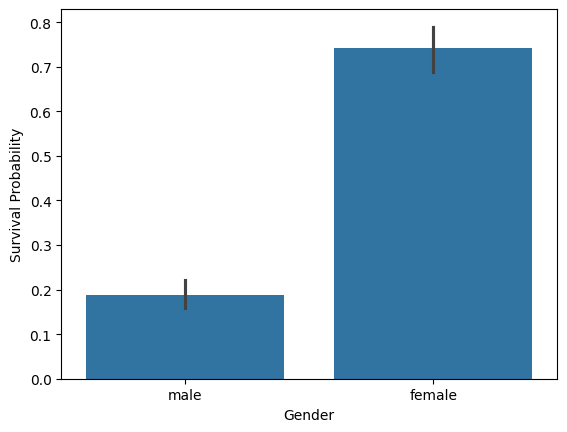

In [18]:
sns.barplot(x = 'Sex', y = "Survived", data = train)
plt.xlabel('Gender')
plt.ylabel('Survival Probability')

In [19]:
train['Pclass'].value_counts(dropna=False)

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [20]:
train['Embarked'].value_counts(dropna=False)

Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

In [21]:
train[['Pclass','Survived']].groupby('Pclass', as_index= False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [22]:
# pd.crosstab([train.Sex, train.Survived], train.Pclass, margins=True).style.background_gradient(cmap='summer_r')

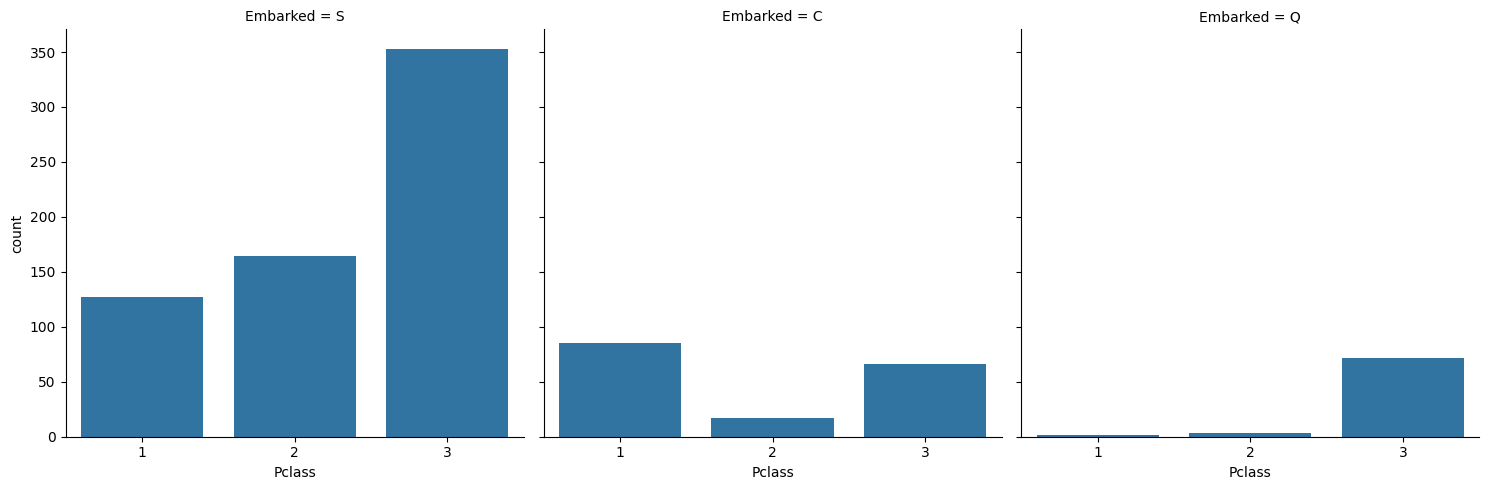

In [23]:
sns.catplot(x='Pclass', col ="Embarked", data = train, kind = "count")

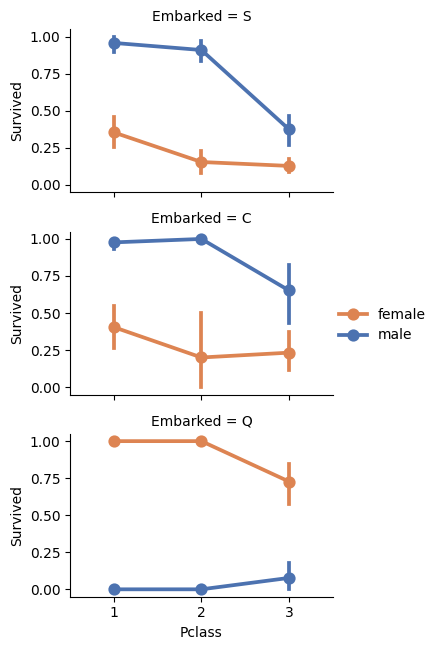

In [24]:
grid = sns.FacetGrid(train, row = "Embarked", height = 2.2, aspect = 1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette = 'deep')
grid.add_legend()

Text(0.5, 1.0, 'Passager Age Distribution')

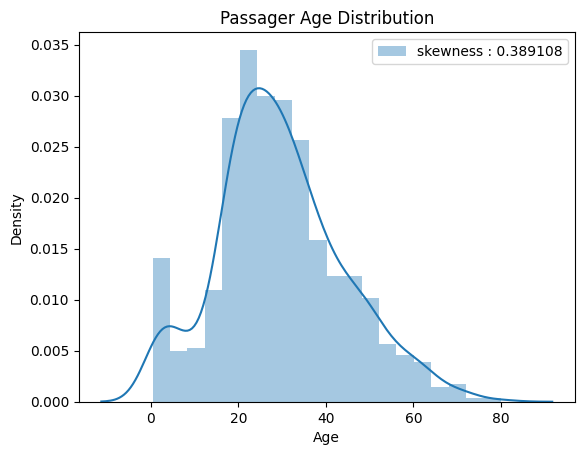

In [25]:
sns.distplot(train['Age'], label = 'skewness : %2f'%(train['Age'].skew()))
plt.legend(loc = 'best')
plt.title('Passager Age Distribution')

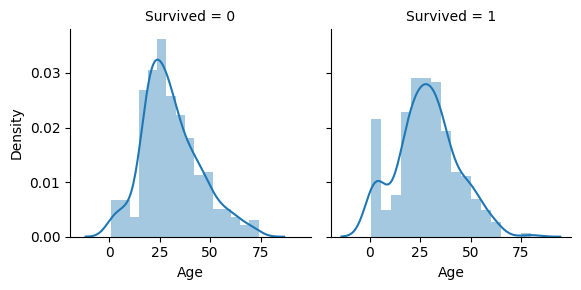

In [26]:
g = sns.FacetGrid(train, col = 'Survived')
g.map(sns.distplot, 'Age')

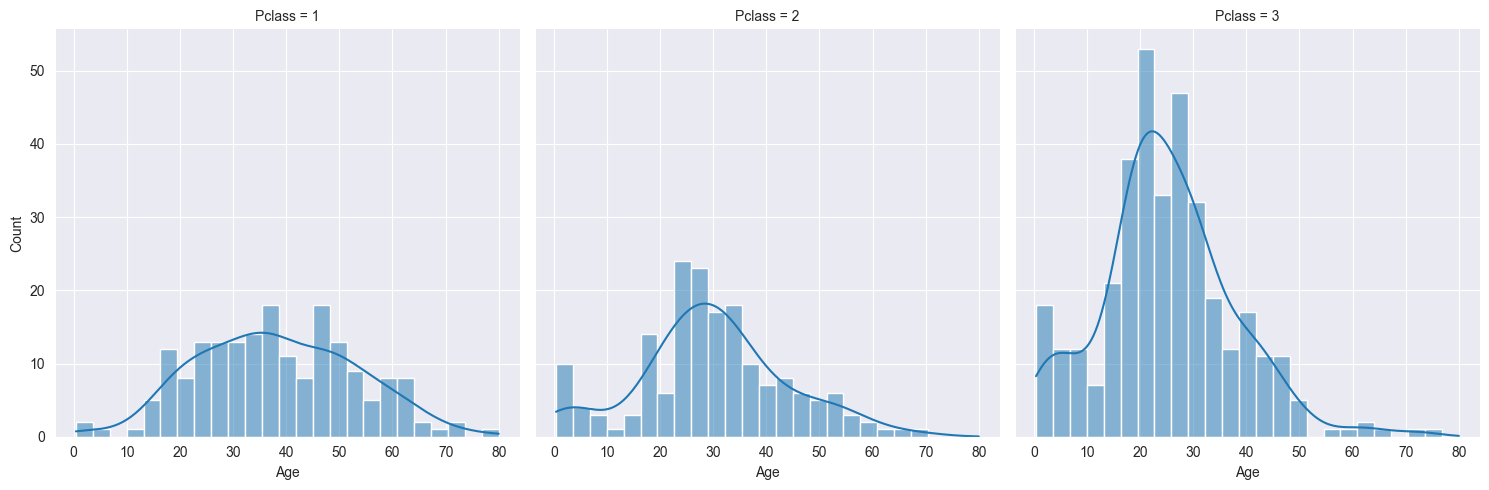

In [27]:
sns.set_style('darkgrid')
sns.displot(data = train, x = 'Age', col = 'Pclass', kde = True, bins = 25)

In [28]:
# EMBARKED

<Axes: xlabel='Embarked', ylabel='count'>

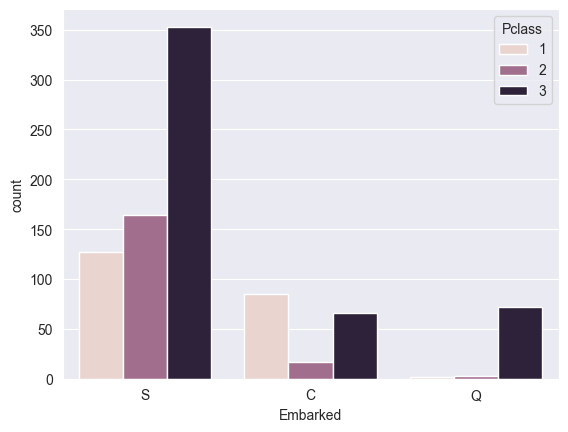

In [29]:
sns.countplot(data = train, x= 'Embarked', hue = 'Pclass')

<Axes: xlabel='Embarked', ylabel='count'>

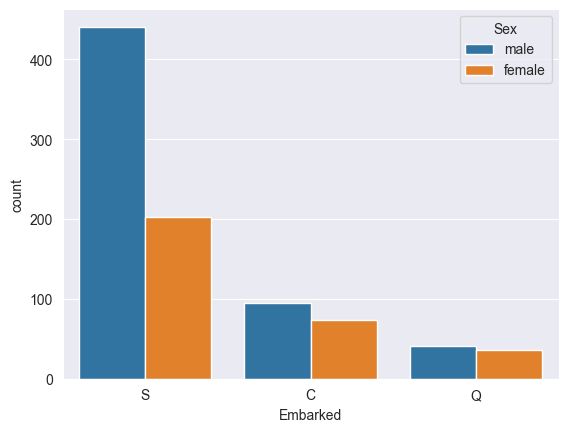

In [30]:
sns.countplot(data = train, x= 'Embarked', hue = 'Sex')

In [31]:
# sns.catplot(x = 'Pclass', y = 'Survived', hue = 'Sex', kind= 'point', col = "Embarked", data = train)
# plt.show()

In [32]:
#SibSp

In [33]:
train[['SibSp','Survived']].groupby('SibSp', as_index= False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


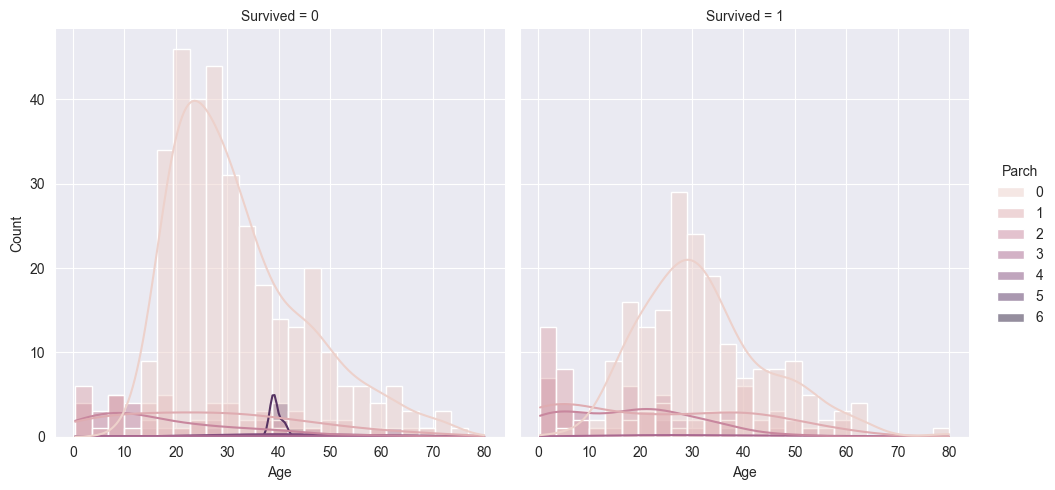

In [34]:
sns.displot(data = train, x = 'Age', col = 'Survived', hue = 'Parch', kde = True, bins = 25)

<Axes: >

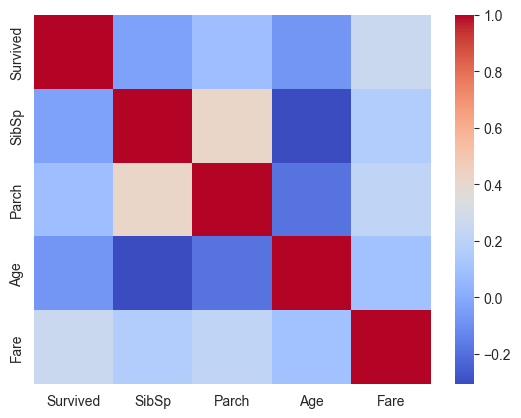

In [35]:
sns.heatmap(train[['Survived', 'SibSp','Parch','Age','Fare']].corr(), annot = False, fmt = ".2f", cmap = 'coolwarm')

In [36]:
train.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [37]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
train = train.drop(["PassengerId","Name","Cabin","Ticket"], axis = 1)

In [39]:
test = test.drop(["PassengerId","Name","Cabin","Ticket"], axis = 1)

In [40]:
train.isnull().sum().sort_values(ascending = False)

Age         177
Embarked      2
Survived      0
Pclass        0
Sex           0
SibSp         0
Parch         0
Fare          0
dtype: int64

In [41]:
test.isnull().sum().sort_values(ascending = False)

Age         86
Fare         1
Pclass       0
Sex          0
SibSp        0
Parch        0
Embarked     0
dtype: int64

In [42]:
train_percentage = train.isna().sum() / train.shape[0]
print(train_percentage[train_percentage > 0.10])
train = train.drop(train_percentage[train_percentage > 0.8].index, axis = 1)

Age    0.198653
dtype: float64


In [43]:
test_percentage = test.isna().sum() / test.shape[0]
print(test_percentage[test_percentage > 0.50])
test = test.drop(test_percentage[test_percentage > 0.8].index, axis = 1)

Series([], dtype: float64)


In [44]:
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
review = train["Age"].values.reshape(-1,1)
train["Age"] = imputer.fit_transform(review)

imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
review = test["Age"].values.reshape(-1,1)
test["Age"] = imputer.fit_transform(review)

In [45]:
train.isnull().sum().sort_values(ascending = False)

Embarked    2
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [46]:
test.isnull().sum().sort_values(ascending = False)

Fare        1
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [47]:
le = preprocessing.LabelEncoder()
for name in train.columns:
  if train[name].dtypes == 'O':
    train[name] = train[name].astype(str)
    le.fit(train[name])
    train[name] = le.transform(train[name])

for column in train.columns:
  null_vals = train.isnull().values
  a, b = np.unique(train.values[~null_vals], return_counts = 1)
  train.loc[train[column].isna(), column] = np.random.choice(a, train[column].isnull().sum(), p=b / b.sum())



In [48]:
le = preprocessing.LabelEncoder()
for name in test.columns:
  if test[name].dtypes == 'O':
    test[name] = test[name].astype(str)
    le.fit(test[name])
    test[name] = le.transform(test[name])

for column in test.columns:
  null_vals = test.isnull().values
  a, b = np.unique(test.values[~null_vals], return_counts = 1)
  test.loc[test[column].isna(), column] = np.random.choice(a, test[column].isnull().sum(), p=b / b.sum())

In [49]:
train.isnull().sum().sort_values(ascending = False)

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [50]:
test.isnull().sum().sort_values(ascending = False)

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [52]:
x = train.drop(['Age','Survived'], axis = 1)
y = train['Survived']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

lr = LogisticRegression()
model = lr.fit(x_train, y_train)
predictions = lr.predict(x_test)

nb_model = GaussianNB()
nb_model.fit(x_train, y_train)
nb_prediction = nb_model.predict(x_test)

print(f'Accurary Model Naive Bayes : {metrics.accuracy_score(nb_prediction, y_test)}')
print(f'Accurary Model Logistic Regression : {metrics.accuracy_score(predictions, y_test)}')
print(f'Precision Model : {metrics.precision_score(predictions, y_test)}')
print(f'Recall Model : {metrics.recall_score(predictions, y_test)}')
print(f'F1 Model : {metrics.f1_score(predictions, y_test)}')
print(f'ROC_AUC Model : {metrics.roc_auc_score(predictions, y_test)}')
print(f'Squared Error {sqrt(mean_squared_error(y_test, predictions))}')
print(f'Absolute Error {mean_absolute_error(y_test, predictions)}')

Accurary Model Naive Bayes : 0.7985074626865671
Accurary Model Logistic Regression : 0.7761194029850746
Precision Model : 0.7297297297297297
Recall Model : 0.7297297297297297
F1 Model : 0.7297297297297297
ROC_AUC Model : 0.7693234635909796
Squared Error 0.47316022340738384
Absolute Error 0.22388059701492538


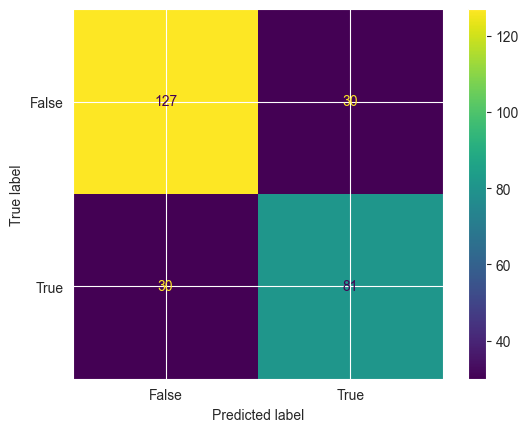

In [53]:
confusion_matrix = metrics.confusion_matrix(y_test, predictions)
display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[False,True])
display.plot()
plt.show()